# |Zomato -DS2306-Sudhanshu Kumar Singh -20-11-2023|

In [87]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [88]:
#Loading dataset
zomato_data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/zomato_1.csv",encoding='ISO-8859-1')
country_code = pd.read_excel("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/Country-Code.xlsx")

In [89]:
zomato_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [90]:
country_code.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [91]:
# Merge datasets on 'Country Code'
merged_data = pd.merge(zomato_data, country_code, how='left', left_on='Country Code', right_on='Country Code')

In [92]:
merged_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [93]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [83]:
# Data Cleaning and Pre-processing
selected_columns = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'Country']

data_for_prediction = merged_data[selected_columns].dropna()

In [84]:
# Encoding Cuisines
merged_data['Cuisines'] = merged_data['Cuisines'].astype(str)  # Ensure 'Cuisines' is treated as a string
cuisines = merged_data['Cuisines'].str.get_dummies(',')
data_for_prediction = pd.concat([data_for_prediction, cuisines], axis=1)

In [99]:
# Split data into features (X) and target variables (y)
X = data_for_prediction.drop(['Average Cost for two', 'Price range'], axis=1)
y_cost = data_for_prediction['Average Cost for two']
y_price_range = data_for_prediction['Price range']

In [100]:
# Label Encoding for categorical columns
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

In [119]:
# Train-Test Split
X_train, X_test, y_cost_train, y_cost_test, y_price_range_train, y_price_range_test = train_test_split(
    X_encoded, y_cost, y_price_range, test_size=0.2, random_state=42)

In [102]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_cost_train)
lr_cost_pred = lr_model.predict(X_test)

In [103]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_cost_train)
dt_cost_pred = dt_model.predict(X_test)

In [124]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_cost_train)
rf_cost_pred = rf_model.predict(X_test)

In [125]:
# Model Evaluation for 'Average Cost for two'
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_cost_test, lr_cost_pred))
print("Decision Tree Regression - Mean Squared Error:", mean_squared_error(y_cost_test, dt_cost_pred))
print("Random Forest Regression - Mean Squared Error:", mean_squared_error(y_cost_test, rf_cost_pred))

Linear Regression - Mean Squared Error: 2.202551454256282e+22
Decision Tree Regression - Mean Squared Error: 601141099.626009
Random Forest Regression - Mean Squared Error: 346458522.32951677


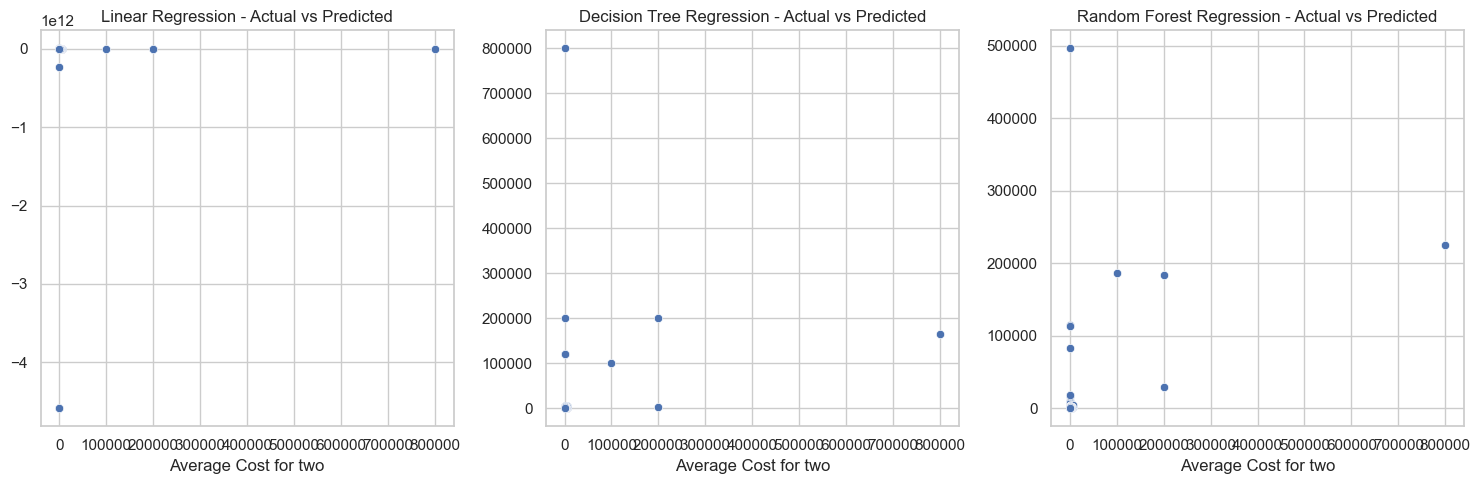

In [116]:
# Visualize Predictions for 'Average Cost for two'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_cost_test, y=lr_cost_pred)
plt.title('Linear Regression - Actual vs Predicted')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_cost_test, y=dt_cost_pred)
plt.title('Decision Tree Regression - Actual vs Predicted')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_cost_test, y=rf_cost_pred)
plt.title('Random Forest Regression - Actual vs Predicted')

plt.tight_layout()
plt.show()